## Time Series Properties

#### Stationarity

When we consider a time series, we often want to think about the underlying statistical process that generates the data we have observed. This data-generating process is what we want to understand - either to obtain estimates of its statistical properties or to use theses properties to forecast future values of the time series. So what kind of processes can we work with in time series analysis?

An important property for many, but not all, methods in time series analysis is that the process is 'stationary'. That is to say: the future should look like the past. More formally, the distribution function of a future sequence of values is equal to the distribution function of the values up to a point in time. This is the strict defintion of stationarity, where we require that the distribution from which an observation is drawn is the same at any point in time. Weaker definitions of stationarity require only that the mean and autocovariance of the process remain the same through time.

While the differences between the types of stationarity are important, the main idea to take from the definition is that the stationary process has the same probability distribution at all times. This is crucial because it's this distribution that we're often trying to identify. There is little point in trying to identify 'the data generating process' if that process is not consistent through all of our observations. So when modeling a time series, we are first going to ask "is this data coming from a stationary process?" If we think not, then we need to see if we can make extract a stationary process for analysis.

Below we'll create two different processes, one of which is a replica of the random walk we saw in the last section. The other is a white noise process.

<Axes: xlabel='time'>

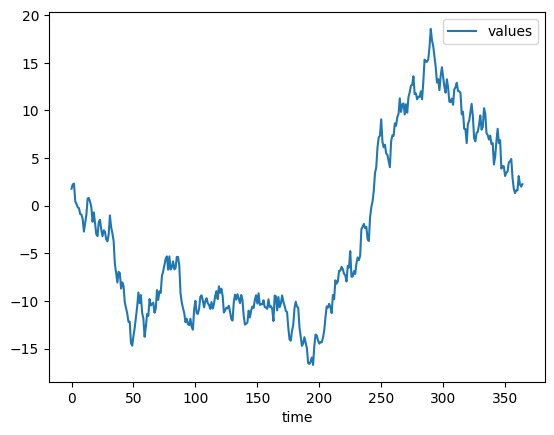

In [1]:
import numpy as np  # For random number generation and array operations.
import pandas as pd  # For creating and working with dataframes, to make manipulation easier.
import statsmodels.api as sm

np.random.seed(3)  # Set random seed, for reproducability.

# First we'll plot a random walk, similarly to the last section (although the different random seed will give us a different process)
df1 = pd.DataFrame(dict(time=np.arange(365), values=np.random.randn(365).cumsum()))
df1.plot(y="values", x="time")

<Axes: xlabel='time'>

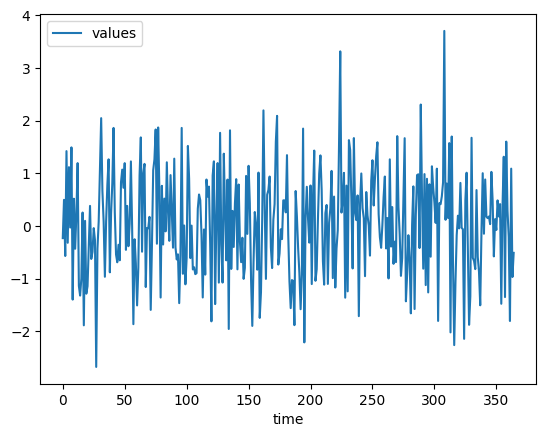

In [2]:
# Now let's plot a white noise, by drawing from the standardised Normal again, but without adding to the previous value.
df2 = pd.DataFrame(dict(time=np.arange(365), values=np.random.randn(365)))
df2.plot(y="values", x="time")

What can we say about these processes when we look at them? The most prominent feature of the second is the erratic way it jumps around (note that the scales are not the same). But, crucially, it's jumping around a line that would lie horizontally approximately near zero. The random walk is moving in one direction for a period, and then occasionally reversing to trend in the opposite direction. It doesn't look like the first figure is hovering around a y-value.

Another way of thinking about this is that the first chart doesn't look to be coming from the same distribution at all points in time - it doesn't look to be stationary. Contrast that with the second figure, which we noted looks to be oscillating somewhere around 0. The white noise process we created here _is_ a stationary process!

Now, we've only looked at these two series and said "one looks like it is jumping pretty consistently around a level and the other does not". That's not a formal mechanism for identifying stationarity (although it often works well when there are identifiable trends). So we need a more concrete and robust approach to tell us whether a time series is stationary, prior to applying a model to it. Before that, however, we'll take a quick detour to look at the key concept of _unit roots_.

#### A Detour on Unit Roots (INCOMPLETE)

Before we delve further into the tests of stationarity, we should address the topic of unit roots. This is a property of some time series and, when present, can make working with these time series very challenging.


$x_t = x_{t-1} + \epsilon_t$

#### Testing for Stationarity

If we know that stationarity is an important property for our ability to make inference about a time series, how can we test whether the time series we have to work with is stationary?

There are various statistical tests we can use, the most basic of which is the Augmented Dickey-Fuller (an expansion of the Dickey-Fuller) test. That's what we'll look at here. The difference between the original and augmented versions are that the ADF includes more lags of the variable: rather than just using $y_{t-1}$ on the right hand side, it uses variables up to order $y_{t-p}$. It is thus a less restrictive form of test.

The ADF test is a statistical test which checks for the presence of a unit root in the time series, and as such it has a null hypothesis and an alternative hypothesis. The null hypothesis is that the series has a unit root, and the alterntaive is that the series has no unit root. As usual, the p-value associated with the test should be considered as a guide. P-values around 0.05 (as an example threshold) should lead to more investigation, rather than rejection or failure to reject.

In [7]:
from statsmodels.tsa.stattools import adfuller

"""
We'll use the function suggested in the statsmodels documentation (https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html)
to print clear results for the ADF test. 
This can be interpreted like any other frequentist hypothesis test.
"""
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)


adf1 = adf_test(df1["values"])
adf1

Results of Dickey-Fuller Test:
Test Statistic                  -1.057050
p-value                          0.731893
#Lags Used                       0.000000
Number of Observations Used    364.000000
Critical Value (1%)             -3.448443
Critical Value (5%)             -2.869513
Critical Value (10%)            -2.571018
dtype: float64


Looking at the output of the ADF test for the first time series we created (the random walk), we can see that the p-value provided is ~0.73. Given a p-value that size, we'd fail to reject the null hypothesis - that the data has a unit root - and thus we'd say that this series is likely to be non-stationary. Of course, we know this to be the case since non-stationarity is a property of the random walk we built.

But now we can contrast this result with the outcome of running the ADF test on the second time series we created, which we designed to be white noise.

In [6]:
adf2 = adf_test(df2["values"])
adf2

Results of Dickey-Fuller Test:
Test Statistic                 -19.163268
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    364.000000
Critical Value (1%)             -3.448443
Critical Value (5%)             -2.869513
Critical Value (10%)            -2.571018
dtype: float64


#### Footnote

A detailed reference on the topic of unit roots and tests for stationarity can be found in the Univerity of Washington notes [here](https://faculty.washington.edu/ezivot/econ584/notes/unitroot.pdf).